<a href="https://colab.research.google.com/github/dagobertomedeiros/curso_analise_series_temporais/blob/main/curso_ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
dados = '/content/gdrive/My Drive/temp/AirPassengers.csv'

In [5]:
data_stock = '/content/gdrive/My Drive/temp/all-stocks-2006-01-01-to-2018-01-01.csv'

## Previsão com Médias Móveis

In [6]:
data_parse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(dados, parse_dates=['Month'], index_col='Month', date_parser=data_parse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [7]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


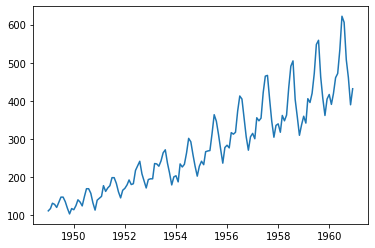

In [8]:
plt.plot(data)

In [9]:
optimal_n = None
best_mse = None

db = data[['#Passengers']].values.astype('float32')
mean_results_for_all_possible_n_value = np.zeros(int(len(db) / 2 - 2)) #np.zeros gera uma matriz de zeros

for n in range(3, int(len(db) / 2 + 1)):
  mean_for_n = np.zeros(len(db) - n)
  for i in range(0, len(db) - n):
    mean_for_n[i] = np.power(np.mean(db[:,0][i:i+n]) - db[i + n][0], 2) #[:,0] - siginifica [first_rows : end_rows, colunm 0]
  mean_results_for_all_possible_n_value[n-3] = np.mean(mean_for_n)

optimal_n = np.argmin(mean_results_for_all_possible_n_value) + 3
best_mse = np.min(mean_results_for_all_possible_n_value)

print('MSE = %s' % mean_results_for_all_possible_n_value)
print('Melhor MSE = %s' % best_mse)
print('Otimo n = %s' % optimal_n)

MSE = [ 2339.63356126  2764.88660714  3012.10128709  3151.45469085
  3227.18632274  3256.56100643  3186.6614532   3011.60186946
  2743.00652782  2472.34091928  2354.71361401  2403.15665424
  2555.64628844  2755.90582275  2957.73325883  3148.95678109
  3318.74202065  3471.20655414  3579.85735927  3632.1383133
  3621.28446048  3590.00382793  3614.46072399  3714.23057056
  3856.30383806  4039.07639445  4228.22951927  4417.98332931
  4590.62775569  4759.11651611  4915.97544876  5048.63704665
  5147.82094512  5226.01903743  5334.33177783  5486.37155691
  5665.83581156  5879.92290769  6108.05805477  6311.94563847
  6507.04778972  6685.18398409  6897.90877682  7105.06745207
  7299.11089319  7470.66004841  7664.68188379  7894.86749032
  8104.34268864  8337.10501668  8595.05628641  8844.55092457
  9063.90415815  9272.33339998  9544.40100932  9837.04023888
 10135.60331142 10420.20548681 10725.07181564 11069.94461765
 11393.32528446 11748.71711731 12111.18046458 12433.46474122
 12664.11747454 129

In [10]:
print('MA = %s' % np.mean(db[:, 0][len(db) - optimal_n : len(db)]))

MA = 427.66666


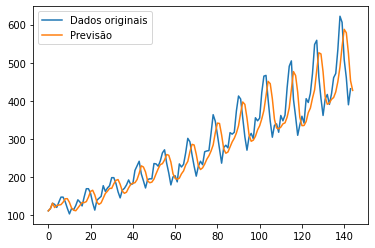

In [11]:
forecast = np.zeros(len(db) + 1)
for i in range(0, optimal_n):
  forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n + 1):
  forecast[i + optimal_n] = np.mean(db[:,0][i:i + optimal_n])

plt.plot(db[:,0], label='Dados originais')
plt.plot(forecast, label='Previsão')
plt.legend()
plt.show()

## Decomposição de series

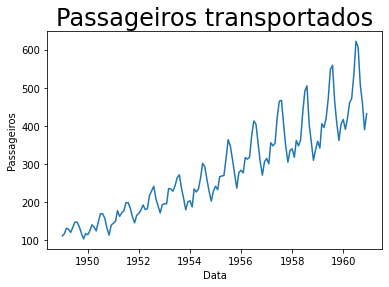

In [12]:
plt.plot(data)
plt.title('Passageiros transportados', fontsize=24)
plt.xlabel('Data')
plt.ylabel('Passageiros')
plt.show()

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
result = seasonal_decompose(data, model='multiplicative')

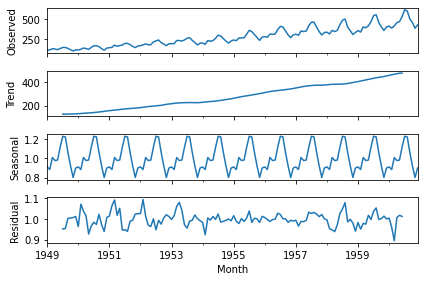

In [15]:
result.plot()
plt.show()

In [16]:
result2 = seasonal_decompose(data, model='aditive')

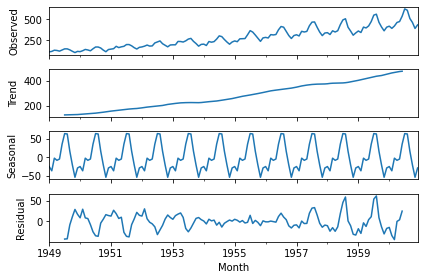

In [17]:
result2.plot()
plt.show()

## Teste de estacionariedade

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
X = data['#Passengers']
resultTest = adfuller(X) #valor de P maior de 0,05 então não é estácionaria
print(resultTest)
print('ADF Estatística: %f' % resultTest[0])
print('Valor de P: %f' % resultTest[1])
print('Valores Critícos:')
for key, value in resultTest[4].items():
  print("\t%s: %.3f" % (key, value))

(0.8153688792060418, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
ADF Estatística: 0.815369
Valor de P: 0.991880
Valores Critícos:
	1%: -3.482
	5%: -2.884
	10%: -2.579


## Logs estacionariedade

In [20]:
d_log = np.log(data)

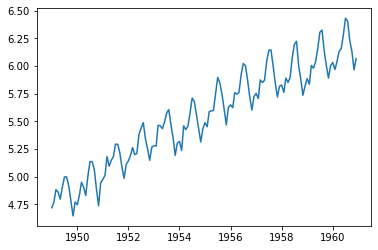

In [21]:
plt.plot(d_log) #técnica pode funcionar em alguns casos, neste apenas houve leve suavização

## Diferenciação
##### Técnicas mais robustas para tornar uma série estacionária

In [22]:
y = data['#Passengers']

In [23]:
def adf_test(y):
  print('Resultado do teste de Dick-Fuller:')
  dftest = adfuller(y, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Teste', 'Valor P', '# de lags', '# de observações'])
  for key, value in dftest[4].items():
    dfoutput['Valor crítico({})'.format(key)] = value
  print(dfoutput)

In [24]:
adf_test(y)

Resultado do teste de Dick-Fuller:
Teste                   0.815369
Valor P                 0.991880
# de lags              13.000000
# de observações      130.000000
Valor crítico(1%)      -3.481682
Valor crítico(5%)      -2.884042
Valor crítico(10%)     -2.578770
dtype: float64


In [25]:
y_diff = np.diff(y)

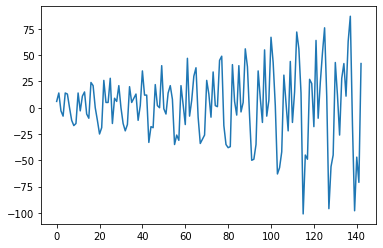

In [26]:
plt.plot(y_diff)

In [27]:
adf_test(y_diff)

Resultado do teste de Dick-Fuller:
Teste                  -2.829267
Valor P                 0.054213
# de lags              12.000000
# de observações      130.000000
Valor crítico(1%)      -3.481682
Valor crítico(5%)      -2.884042
Valor crítico(10%)     -2.578770
dtype: float64


In [28]:
y_diff2 = np.diff(y_diff)

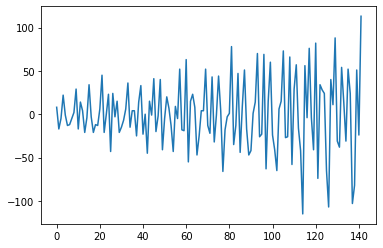

In [29]:
plt.plot(y_diff2)

In [30]:
adf_test(y_diff2) #valor de P abaixo de 0,05 na diferenciação de 2ª ordem

Resultado do teste de Dick-Fuller:
Teste                -1.638423e+01
Valor P               2.732892e-29
# de lags             1.100000e+01
# de observações      1.300000e+02
Valor crítico(1%)    -3.481682e+00
Valor crítico(5%)    -2.884042e+00
Valor crítico(10%)   -2.578770e+00
dtype: float64


##### Diferenciação com log

In [31]:
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()

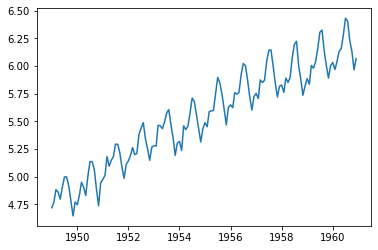

In [32]:
indexedDataSet_logScale = np.log(data)
plt.plot(indexedDataSet_logScale)

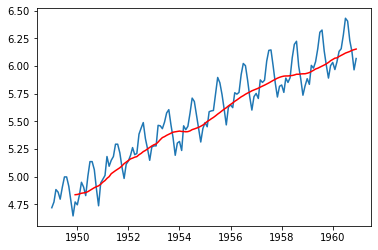

In [33]:
movingAverage = indexedDataSet_logScale.rolling(window=12).mean()
movingStd = indexedDataSet_logScale.rolling(window=12).std()
plt.plot(indexedDataSet_logScale)
plt.plot(movingAverage, color='red')

In [34]:
datasetLogScaleMinusMovingAverage = indexedDataSet_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [35]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True) #remover os valores ausentes
datasetLogScaleMinusMovingAverage.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [36]:
def test_stationarity(timeseries):
  movingAverage = timeseries.rolling(window=12).mean()
  movingStd = timeseries.rolling(window=12).std()

  orig = plt.plot(timeseries, color='blue', label='original')
  mean = plt.plot(movingAverage, color='red', label='Média Móvel')
  std = plt.plot(movingStd, color='black', label='Desvio Padrão')
  plt.legend(loc='best')
  plt.title('Média Móvel e Desvio Padrão')

  print('Resultado do teste de Dick-Fuller:')
  dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Teste', 'Valor P', '# de lags', '# de observações'])
  for key, value in dftest[4].items():
    dfoutput['Valor crítico({})'.format(key)] = value
  print(dfoutput)

Resultado do teste de Dick-Fuller:
Teste                  -3.162908
Valor P                 0.022235
# de lags              13.000000
# de observações      119.000000
Valor crítico(1%)      -3.486535
Valor crítico(5%)      -2.886151
Valor crítico(10%)     -2.579896
dtype: float64


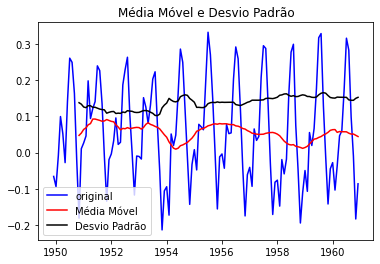

In [37]:
test_stationarity(datasetLogScaleMinusMovingAverage)

## Remoção de tendência com regressão linear

In [38]:
X1 = [i for i in range(0, len(data))]
X1 = np.reshape(X1, (len(X1), 1))
y1 = data.values

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()
model.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
trend = model.predict(X1)

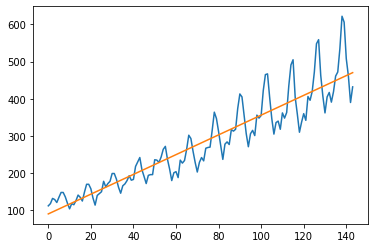

In [42]:
plt.plot(y1)
plt.plot(trend)
plt.show()

In [43]:
detrend = [y1[i] - trend[i] for i in range(0, len(data))]

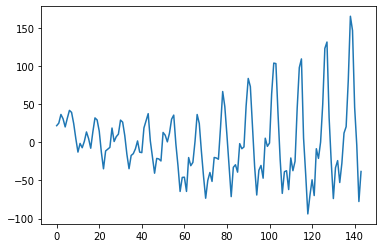

In [44]:
plt.plot(detrend)
plt.show()

## Médias móveis variação de ações

In [45]:
stock = pd.read_csv(data_stock, index_col='Date', parse_dates=['Date'])

In [46]:
stock.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [47]:
g_stk = stock.query('Name == "GOOGL"')

In [48]:
g_stk.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [49]:
g_stk['Ticks'] = range(0, len(g_stk.index.values))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
g_stk.head()

,Open,High,Low,Close,Volume,Name,Ticks
Date,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,0
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,3
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,4


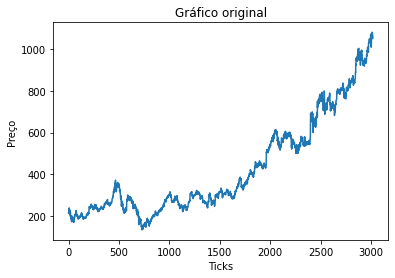

In [51]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Preço')
ax1.set_title('Gráfico original')
ax1.plot('Ticks', 'Open', data=g_stk)

In [52]:
g_stk['Rolling_mean'] = g_stk['Open'].rolling(window=80).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
g_stk.head()

,Open,High,Low,Close,Volume,Name,Ticks,Rolling_mean
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,0,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1,NaN
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2,NaN
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,3,NaN
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,4,NaN


In [54]:
filt_g = g_stk[(g_stk['Ticks'] >= 900) & (g_stk['Ticks'] <= 1100)]

In [55]:
filt_g.head()

,Open,High,Low,Close,Volume,Name,Ticks,Rolling_mean
Date,,,,,,,,
2009-07-31,225.21,226.58,221.44,221.75,2861550,GOOGL,900,205.07250
2009-08-03,224.59,227.18,224.04,226.33,2591173,GOOGL,901,205.60575
2009-08-04,224.91,227.23,224.44,227.09,2390098,GOOGL,902,206.10550
2009-08-05,228.23,228.68,224.16,225.80,2342227,GOOGL,903,206.63525
2009-08-06,227.38,227.67,224.49,225.41,2111395,GOOGL,904,207.11925


Text(0.5, 1.0, 'Média Móvel')

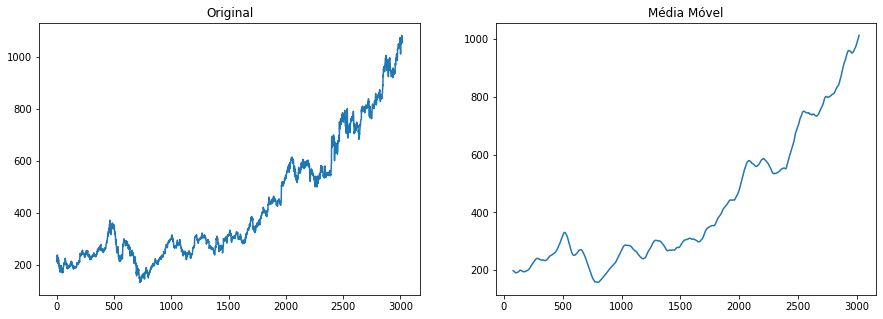

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].plot('Ticks', 'Open', data= g_stk)
axes[0].set_title('Original')
axes[1].plot('Ticks', 'Rolling_mean', data= g_stk)
axes[1].set_title('Média Móvel')

## Suavização exponencial simples

In [57]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [59]:
#SimpleExpSmoothing boa para prever dados sem tendência e sazonalidade claros
fit_ses = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit_ses.forecast(12).rename(r'$alpha=0.2$')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


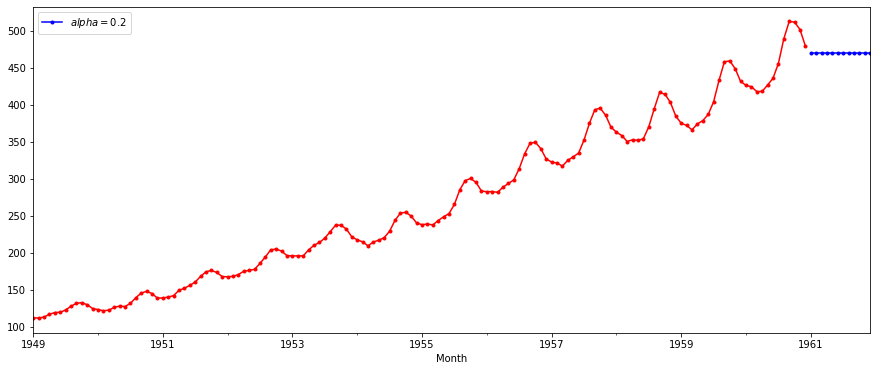

In [62]:
fcast1.plot(marker='.', color='blue', legend=True)
fit_ses.fittedvalues.plot(marker='.', color='red', )

In [63]:
#fazendo o modelo encontrar o próprio valor de alpha
fit_ses2 = SimpleExpSmoothing(data).fit()
fcast2 = fit_ses2.forecast(12).rename(r'$\alpha=%s$' %fit_ses2.model.params['smoothing_level'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


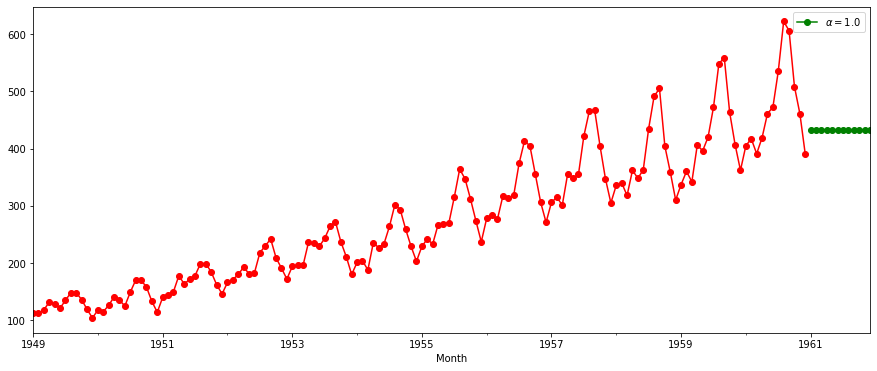

In [64]:
fcast2.plot(marker='o', color='green', legend=True)
fit_ses2.fittedvalues.plot(marker='o', color='red')

In [66]:
#suavização exponencial amortecida
fit_holt = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcastHolt = fit_holt.forecast(12).rename('Holts linear trend')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


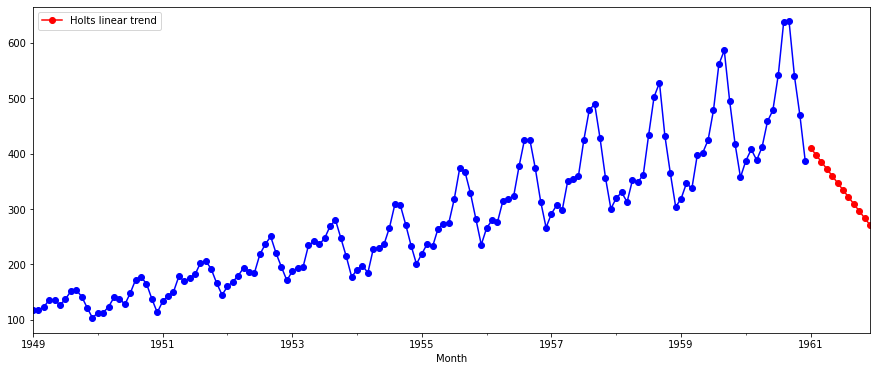

In [68]:
fit_holt.fittedvalues.plot(marker='o', color='blue')
fcastHolt.plot(color='red', marker='o', legend=True)

In [71]:
fit_holt1 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2) #damped gera o amortecimento
fcastHolt1 = fit_holt1.forecast(12).rename('Holts linear trend - aditivo amortecido')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


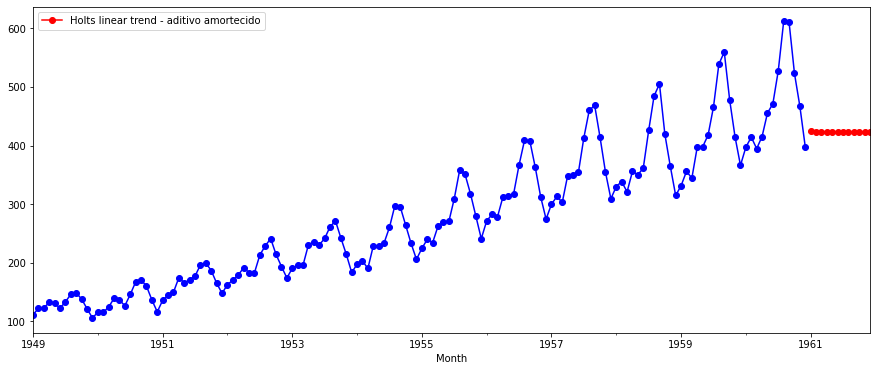

In [72]:
fit_holt1.fittedvalues.plot(marker='o', color='blue')
fcastHolt1.plot(color='red', marker='o', legend=True)

In [75]:
#Holt Winters - é capaz de detectar a tendência e a sazonalidade de uma serie temporal
fit_holt_winters = ExponentialSmoothing(data, seasonal_periods=12, trend='additive', seasonal='additive').fit(use_boxcox=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


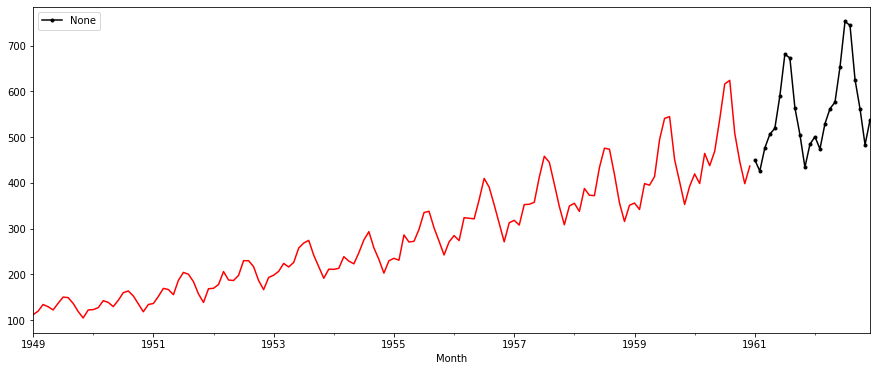

In [83]:
fit_holt_winters.fittedvalues.plot(style='-', color='red')
fit_holt_winters.forecast(24).plot(style='-', marker='.', color='black', legend=True)    #24 representa 2 anos


## Arima

In [84]:
#não permite capturar o elemento sazonal
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

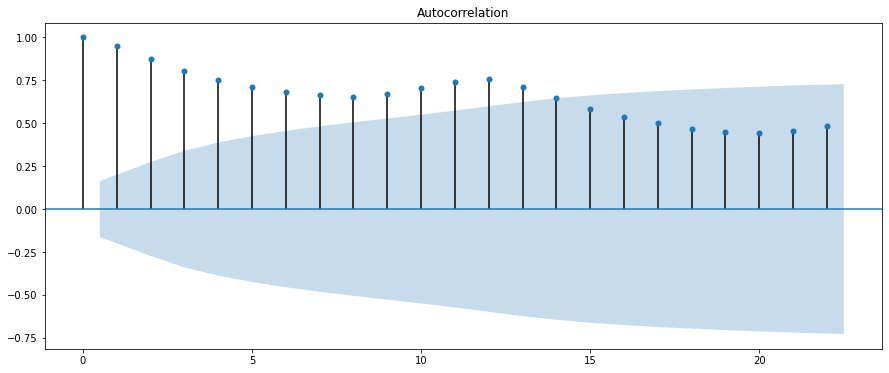

In [88]:
plot_acf(data)
plt.show() #diagrama de autocorrelação

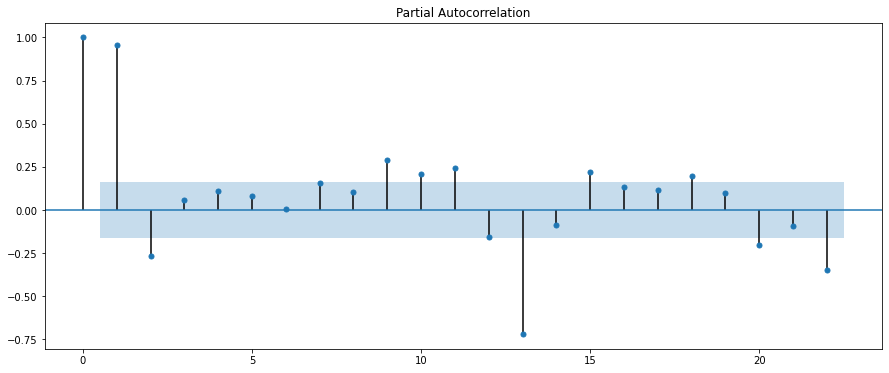

In [89]:
plot_pacf(data) #diagrama de autocorrelacao parcial
plt.show()

In [90]:
from statsmodels.tsa.arima_model import ARIMA

In [92]:
model = ARIMA(data, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -675.848
Method:                       css-mle   S.D. of innovations             26.881
Date:                Wed, 29 Sep 2021   AIC                           1361.696
Time:                        02:27:14   BIC                           1376.510
Sample:                    02-01-1949   HQIC                          1367.716
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6695      0.132     20.185      0.000       2.410       2.929
ar.L1.D.#Passengers     1.1043      0.071     15.460      0.000       0.964       1.244
ar.L2.D.#Passeng

In [93]:
residuals = pd.DataFrame(model_fit.resid)

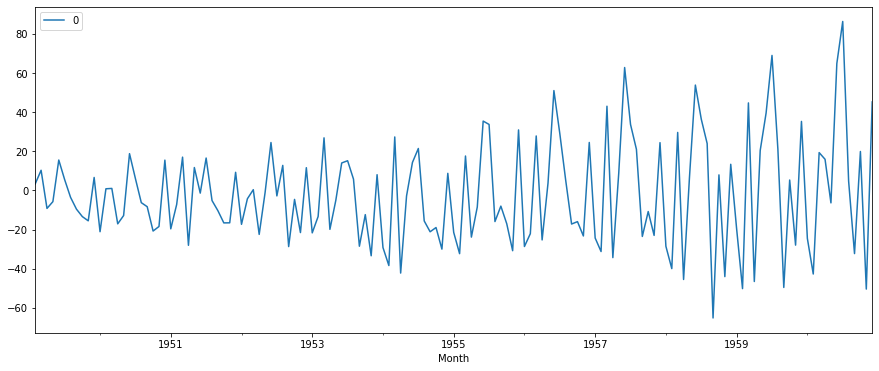

In [95]:
residuals.plot()
plt.show()

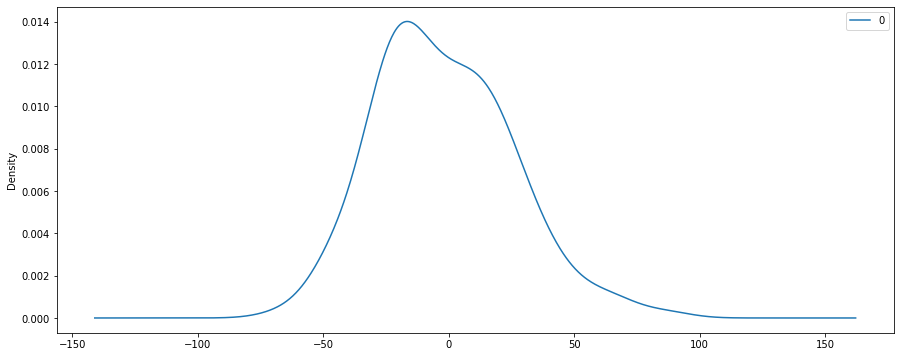

                0
count  143.000000
mean    -1.872757
std     27.089961
min    -65.205321
25%    -21.498704
50%     -5.081137
75%     15.732199
max     86.376636


In [97]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe()) #o ideal é a média estar próxima de zero

In [98]:
X = data.values

Previsto= 363.599087, esperado= 340.000000
Previsto= 353.342835, esperado= 318.000000
Previsto= 327.329943, esperado= 362.000000
Previsto= 386.290524, esperado= 348.000000
Previsto= 351.869976, esperado= 363.000000
Previsto= 374.431834, esperado= 435.000000
Previsto= 446.160548, esperado= 491.000000
Previsto= 478.476883, esperado= 505.000000
Previsto= 471.329541, esperado= 404.000000
Previsto= 348.405963, esperado= 359.000000
Previsto= 351.956925, esperado= 310.000000
Previsto= 320.246241, esperado= 337.000000
Previsto= 376.053191, esperado= 360.000000
Previsto= 387.684997, esperado= 342.000000
Previsto= 356.131797, esperado= 406.000000
Previsto= 435.401668, esperado= 396.000000
Previsto= 395.109791, esperado= 420.000000
Previsto= 425.842328, esperado= 472.000000
Previsto= 472.008902, esperado= 548.000000
Previsto= 535.629404, esperado= 559.000000
Previsto= 515.321149, esperado= 463.000000
Previsto= 399.715926, esperado= 407.000000
Previsto= 388.133822, esperado= 362.000000
Previsto= 3

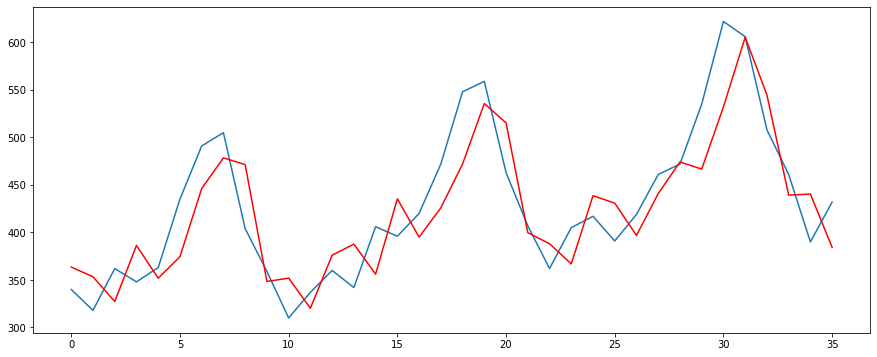

In [100]:
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
  model = ARIMA(history, order=(2,1,1))
  model_fit =model.fit(disp=0)
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('Previsto= %f, esperado= %f' %(yhat,obs))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()